In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
import matplotlib.pyplot as plt

In [4]:

import pandas as pd
file_path = r'C:\Users\admin\Desktop\WORK\datasets\Kaagle_Upload.csv' 
dataset = pd.read_csv(file_path, low_memory=False)
dataset.head(), dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285331 entries, 0 to 285330
Data columns (total 70 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   accident_index                                    285331 non-null  object 
 1   vehicle_reference                                 285331 non-null  int64  
 2   vehicle_type                                      285331 non-null  int64  
 3   towing_and_articulation                           285331 non-null  int64  
 4   vehicle_manoeuvre                                 285331 non-null  int64  
 5   vehicle_location-restricted_lane                  285331 non-null  int64  
 6   junction_location                                 285331 non-null  int64  
 7   skidding_and_overturning                          285331 non-null  int64  
 8   hit_object_in_carriageway                         285331 non-null  int64  
 9   vehi

(  accident_index  vehicle_reference  vehicle_type  towing_and_articulation  \
 0  201506E098757                  2             9                        0   
 1  201506E098766                  1             9                        0   
 2  201506E098766                  2             9                        0   
 3  201506E098777                  1            20                        0   
 4  201506E098780                  1             9                        0   
 
    vehicle_manoeuvre  vehicle_location-restricted_lane  junction_location  \
 0                 18                                 0                  8   
 1                  9                                 0                  8   
 2                 18                                 0                  8   
 3                  4                                 0                  0   
 4                 15                                 0                  1   
 
    skidding_and_overturning  hit_object_in_carriagewa

C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

Accuracy: 87.05%
Confusion Matrix:
[[    0     0   530]
 [    0     2  6697]
 [    0     2 48591]]
Classification Report:
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00       530
         2.0       0.50      0.00      0.00      6699
         3.0       0.87      1.00      0.93     48593

    accuracy                           0.87     55822
   macro avg       0.46      0.33      0.31     55822
weighted avg       0.82      0.87      0.81     55822



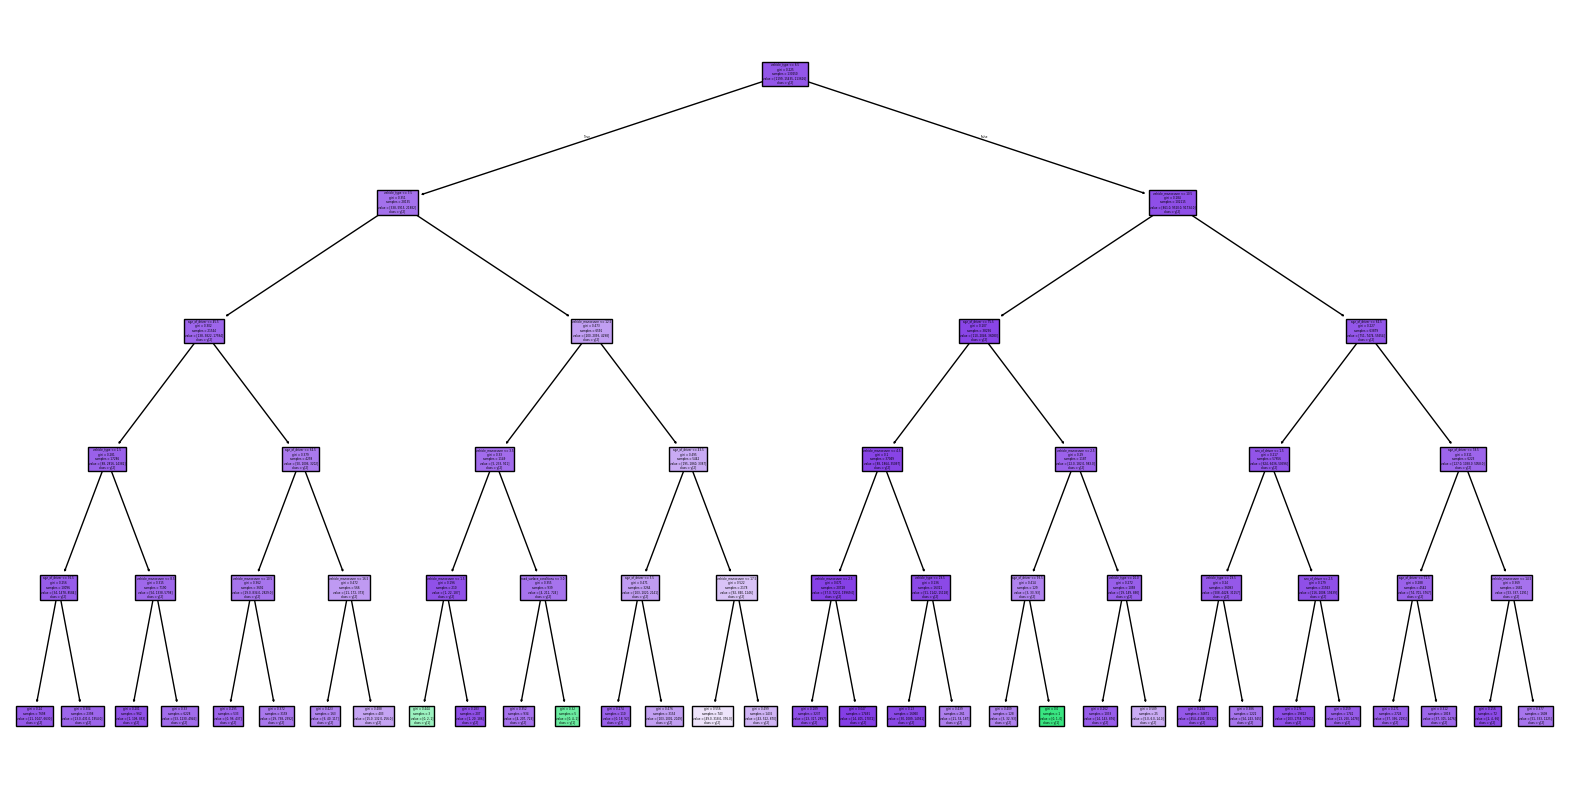

In [28]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
import matplotlib.pyplot as plt


file_path = r'C:\Users\admin\Desktop\WORK\datasets\Kaagle_Upload.csv'  
dataset = pd.read_csv(file_path, low_memory=False)


relevant_columns = ['vehicle_type', 'vehicle_manoeuvre', 'sex_of_driver', 'age_of_driver', 
                    'road_surface_conditions', 'weather_conditions', 'casualty_severity']


filtered_data = dataset[relevant_columns].dropna()


filtered_data = pd.get_dummies(filtered_data, drop_first=True)


X = filtered_data.drop(columns=['casualty_severity'])
y = filtered_data['casualty_severity']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


decision_tree = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)


decision_tree.fit(X_train, y_train)


y_pred = decision_tree.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


plt.figure(figsize=(20,10))
tree.plot_tree(decision_tree, feature_names=X.columns, class_names=True, filled=True)
plt.show()
